Exercise 1
Implementation 5 steps in using the Scikit-Learn by your synthetic data

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#y = x*20 + 5

In [3]:
rng = np.random.RandomState(20)
x = 10*rng.rand(60) 

In [4]:
x.shape

(60,)

In [5]:
y = x*20 + 5 + rng.randn(60)
y

array([122.07097442, 184.54425414, 184.16323971, 169.64863911,
        11.958256  , 144.85491451,  79.25380335, 107.84602487,
       135.76160034,  43.88409118,  59.99100888, 148.87702494,
       162.90215129, 174.07072605, 162.14364414,  12.69229028,
        29.02974915, 153.77042029,  52.94243185,  55.73288176,
       175.67033075, 194.44266012, 116.37515562,  40.27365306,
       158.81091687, 103.93595215, 131.89704328, 173.38698754,
        97.24607173, 105.57750122, 141.02584615, 135.90748075,
        58.34947632,  19.91234043, 158.88449365, 102.34575147,
        69.90237106, 105.22674718,  58.82119908,  66.76876622,
       128.92883897, 115.07329537,  67.0864104 ,  82.15338836,
        55.53874817, 122.00249959,  36.37572408, 125.4847633 ,
       169.6326362 ,  37.40410256, 152.07876158,  86.33580446,
       160.50888361, 164.21785864, 162.38012171, 124.24620055,
       135.93594832, 132.46141911,  91.21918241, 108.64825761])

In [6]:
y.shape

(60,)

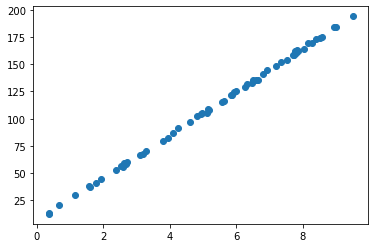

In [7]:
plt.scatter(x,y)

In [8]:
model1 = LinearRegression(fit_intercept=True)
model1

LinearRegression()

In [9]:
x.ndim

1

In [10]:
X = x[:, np.newaxis]

In [11]:
X[:5]

array([[5.88130801],
       [8.97713728],
       [8.91530729],
       [8.15837477],
       [0.35889586]])

In [12]:
X.shape

(60, 1)

In [13]:
model1.fit(X, y)

LinearRegression()

In [14]:
#Create new data
x_new = np.linspace(0,10)
x_new 

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [15]:
# Transforme data x_new into a `[n_samples, n_features]`
X_new = x_new[:, np.newaxis]
ypredict = model1.predict(X_new)

In [16]:
model1.intercept_

4.949872606335916

In [17]:
model1.coef_

array([19.98931499])

In [18]:
# y model real
yreal = x_new*20 + 5

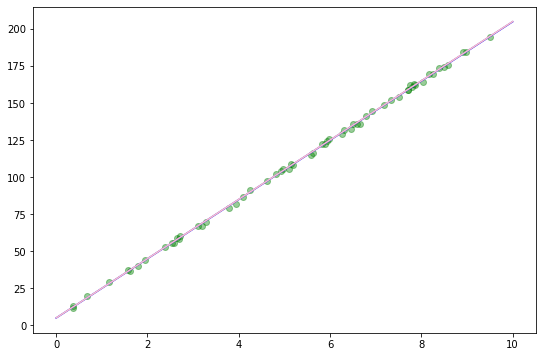

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(x, y,color = "green",alpha=0.4)
plt.plot(x_new, ypredict,color="blue")
plt.plot(x_new,yreal,color = "pink")

Exercise 2:
Implementation GridSearchCV with Scikit-Learn by your synthetic data

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [22]:
def func(x):
    ''' Some function to generate dataset '''
    y = 0.1*x*x*x + 2*x*x + 7*x + 4
    return y

In [23]:
# min and max x values to explore the function on this segment
x_min = -15
x_max = 2

In [24]:
def generate_dataset(x_min, x_max, size=20, random_state=42):
    ''' Generate random dataset from 'x_min' to 'x_max' with 'func' function '''

    rng = np.random.RandomState(random_state)
    x = rng.uniform(low=x_min, high=x_max, size=size) # Draw samples from a uniform distribution interval [low, high)
    y = np.array([func(xi) for xi in x]) + 2 * rng.randn(size)

    return (x, y)

In [25]:
x, y = generate_dataset(x_min, x_max, size=200)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

x_true = np.arange(x_min, x_max, step=0.1)
y_true = np.array([func(xi) for xi in x_true])

Text(0.5, 1.0, 'Generated Dataset')

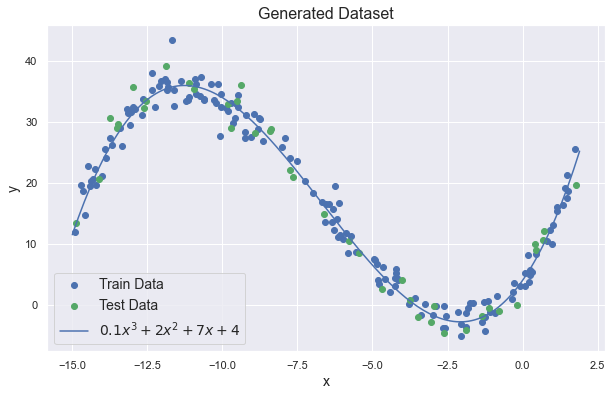

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, color='g', label="Test Data")
plt.plot(x_true, y_true, label='$0.1x^3 + 2x^2 + 7x + 4$')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(loc='lower left', fontsize=14)
plt.title("Generated Dataset", fontsize=16)

In [27]:
X2 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train[:,np.newaxis])
X2[:5]

array([[-1.30302260e+01,  1.69786789e+02, -2.21236023e+03],
       [ 2.50874419e-01,  6.29379742e-02,  1.57895277e-02],
       [-3.36803855e+00,  1.13436837e+01, -3.82059639e+01],
       [-7.24681027e+00,  5.25162591e+01, -3.80575365e+02],
       [-9.59394093e+00,  9.20437025e+01, -8.83061844e+02]])

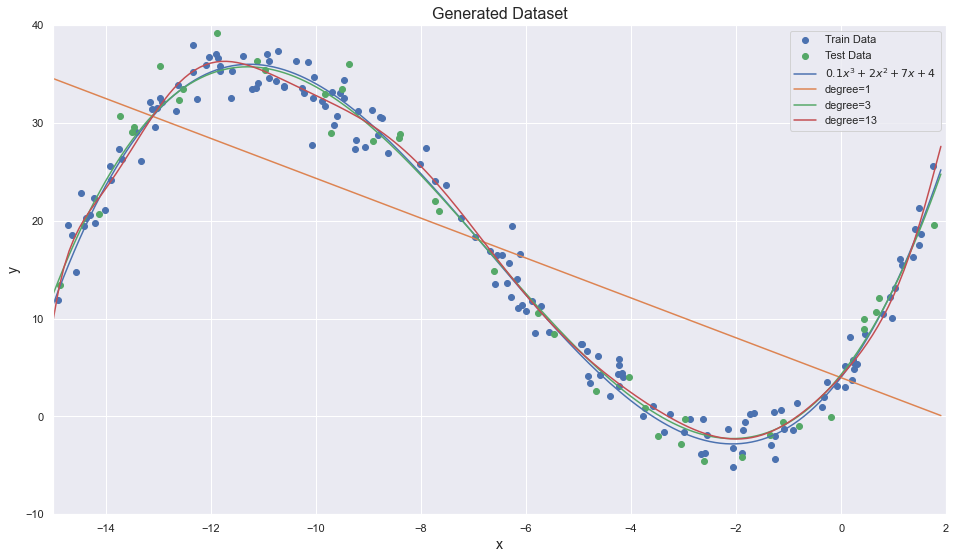

In [28]:
plt.figure(figsize=(16, 9)) 
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, color='g', label="Test Data")
plt.plot(x_true, y_true, label='$0.1x^3 + 2x^2 + 7x + 4$')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(loc='lower left', fontsize=14)
plt.title("Generated Dataset", fontsize=16);


axis = plt.axis()
for degree in [1, 3, 13]:
    X_train = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_train[:,np.newaxis])
    X_test =  PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_true[:,np.newaxis])
    y_predict = LinearRegression().fit(X_train,y_train).predict(X_test)
    plt.plot(x_true, y_predict, label='degree={0}'.format(degree))
plt.xlim(x_min,x_max)
plt.ylim(-10,40)
plt.legend(loc='best')
plt.show()

In [29]:
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree),
                LinearRegression())

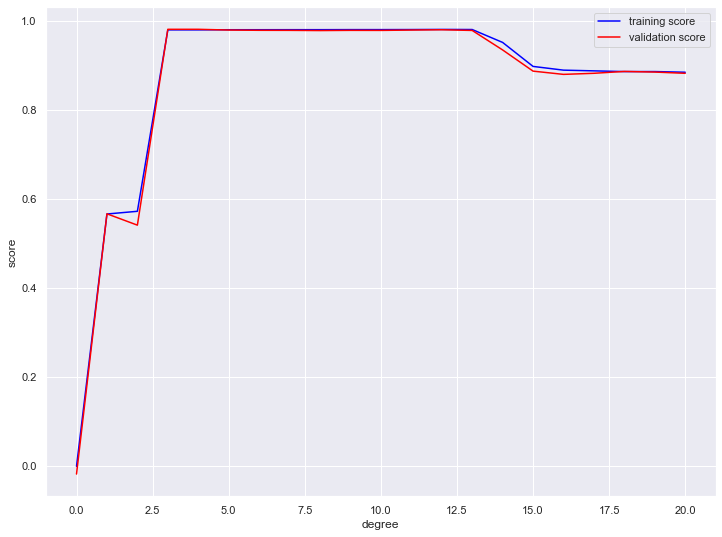

In [30]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), x[:,np.newaxis], y,
                                            param_name = 'polynomialfeatures__degree',
                                            param_range=degree, cv=7)

plt.figure(figsize=(12,9))# THIẾU KÍCH THƯỚC
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')

plt.xlabel('degree')
plt.ylabel('score');

In [33]:
param_grid =  {'polynomialfeatures__degree': np.arange(21),
                'linearregression__fit_intercept': [True, False]}
# Mình bỏ normalize đi do nó khuyến cáo nên sử dụng StandardScaler()

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [34]:
grid.fit(x_train[:,np.newaxis], y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})